In [1]:
# 라이브러리 및 모듈 세팅_06_02_02
import numpy as np
import scipy.special
import matplotlib.pyplot
%matplotlib inline
import imageio
import glob
import pandas as pd

In [2]:
# 3층 신경망 클래스 정의_06_02_03
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        pass
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)        
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# 기본 아키텍처 및 학습률 설정_06_02_04
input_nodes = 784
hidden_nodes = 128
output_nodes = 10
learning_rate = 0.01

In [4]:
# 입력, 은닉, 출력, 학습률 초기화_06_02_05
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
# 학습데이터 불러오기_06_02_06
training_data_file = open("mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()
print(training_data_list[0])

5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [6]:
# 신경망 학습_06_02_07
epochs = 2
for e in range(epochs):
    correct = 0
    total = 0
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        targets = np.zeros(output_nodes) + 0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        # 정확도 계산
        correct_label = int(all_values[0])
        outputs = n.query(inputs)
        predicted_label = np.argmax(outputs)
        if predicted_label == correct_label:
            correct += 1
        total += 1
    
    accuracy = correct / total
    print(f'에포크 {e + 1}의 정확도: {accuracy:.2%}')
    
print(f'최종 에포크의 정확도: {accuracy:.2%}')

에포크 1의 정확도: 91.48%
에포크 2의 정확도: 94.15%
최종 에포크의 정확도: 94.15%


In [7]:
# 테스트데이터 불러오기_06_02_08
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
print(test_data_list[0])

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

array([[0.00282176],
       [0.97188801],
       [0.0236231 ],
       [0.02095197],
       [0.02175621],
       [0.02261061],
       [0.0201362 ],
       [0.02266719],
       [0.01170714],
       [0.01673115]])

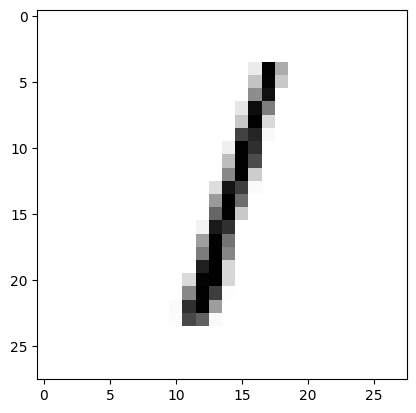

In [8]:
# 신경망 질문하기_06_02_09
all_values = test_data_list[2].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation = 'None')
n.query((np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

In [9]:
# 스코어카드 생성_06_02_10
scorecard = []
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    print("실젯값:", correct_label)
    
    inputs = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print("인공지능 추정:", label)
    if(label == correct_label):
        print('정답')
        scorecard.append(1)
    else:
        print('오답')
        scorecard.append(0)
        pass
    pass

scorecard_array = np.asarray(scorecard)
print(scorecard)
print('performance =', scorecard_array.sum() / scorecard_array.size * 100, '%')


실젯값: 7
인공지능 추정: 7
정답
실젯값: 2
인공지능 추정: 2
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 0
인공지능 추정: 0
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 9
인공지능 추정: 9
정답
실젯값: 5
인공지능 추정: 6
오답
실젯값: 9
인공지능 추정: 9
정답
실젯값: 0
인공지능 추정: 0
정답
실젯값: 6
인공지능 추정: 6
정답
실젯값: 9
인공지능 추정: 9
정답
실젯값: 0
인공지능 추정: 0
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 5
인공지능 추정: 5
정답
실젯값: 9
인공지능 추정: 9
정답
실젯값: 7
인공지능 추정: 7
정답
실젯값: 3
인공지능 추정: 3
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 9
인공지능 추정: 9
정답
실젯값: 6
인공지능 추정: 6
정답
실젯값: 6
인공지능 추정: 6
정답
실젯값: 5
인공지능 추정: 5
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 0
인공지능 추정: 0
정답
실젯값: 7
인공지능 추정: 7
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 0
인공지능 추정: 0
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 3
인공지능 추정: 3
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 3
인공지능 추정: 3
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 7
인공지능 추정: 7
정답
실젯값: 2
인공지능 추정: 2
정답
실젯값: 7
인공지능 추정: 7
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 2
인공지능 추정: 3
오답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 7
인공지능 추정: 7
정답
실젯값: 4
인공지능 추정: 4
정답
실젯값: 2
인공지능 추정: 2
정답
실젯값: 3
인공지능 추정: 3
정답
실젯값: 5
인공지능 추정: 5
정답
실젯값: 1
인공지능 추정: 1
정답
실젯값: 2
인공지능 추